In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10 # 10 classes

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [ ]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
model = Model(i, x)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 17s 4ms/step - loss: 1.5626 - accuracy: 0.4260 - val_loss: 1.2906 - val_accuracy: 0.5336
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2862 - accuracy: 0.5349 - val_loss: 1.1392 - val_accuracy: 0.5948
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1565 - accuracy: 0.5863 - val_loss: 1.0701 - val_accuracy: 0.6244
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0611 - accuracy: 0.6195 - val_loss: 0.9772 - val_accuracy: 0.6573
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9940 - accuracy: 0.6474 - val_loss: 0.9377 - val_accuracy: 0.6742
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9384 - accuracy: 0.6631 - val_loss: 0.9079 - val_accuracy: 0.6840
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8905 - accuracy: 0.6826 - val_loss: 0.8839 - val_accuracy

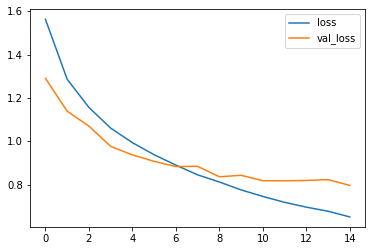

In [ ]:
# Plot loss per iteration

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

**Observation:**

We get an accuracy of 71 percent. So it is clearer now that CIFAR10 is an even more difficult dataset than MNIST and fashion MNIST.

Again, we see that there is some chance that we are Overfitting.

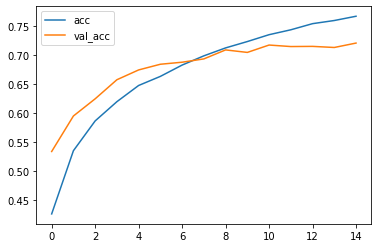

In [ ]:
# Plot accuracy per iteration

plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

**Observation:**

We see that the training accuracy has not yet converged while the validation accuracy is still steady up. This is another sign that we could be Overfitting.

In [ ]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cm

array([[742,  20,  54,  12,  27,   6,  10,  13,  73,  43],
       [ 19, 849,   2,   6,   7,   1,   9,   3,  27,  77],
       [ 58,   6, 560,  68, 137,  57,  61,  37,   9,   7],
       [ 18,   8,  46, 517,  99, 160,  87,  43,  11,  11],
       [ 11,   1,  34,  43, 720,  34,  40, 101,  11,   5],
       [ 13,   4,  27, 203,  73, 566,  43,  62,   1,   8],
       [  7,   3,  25,  44,  72,  16, 818,   9,   5,   1],
       [ 15,   3,  19,  39,  65,  39,  11, 796,   3,  10],
       [ 56,  32,   9,  12,  10,   5,   9,   7, 841,  19],
       [ 36,  82,   3,  18,   4,   4,  10,  16,  31, 796]])

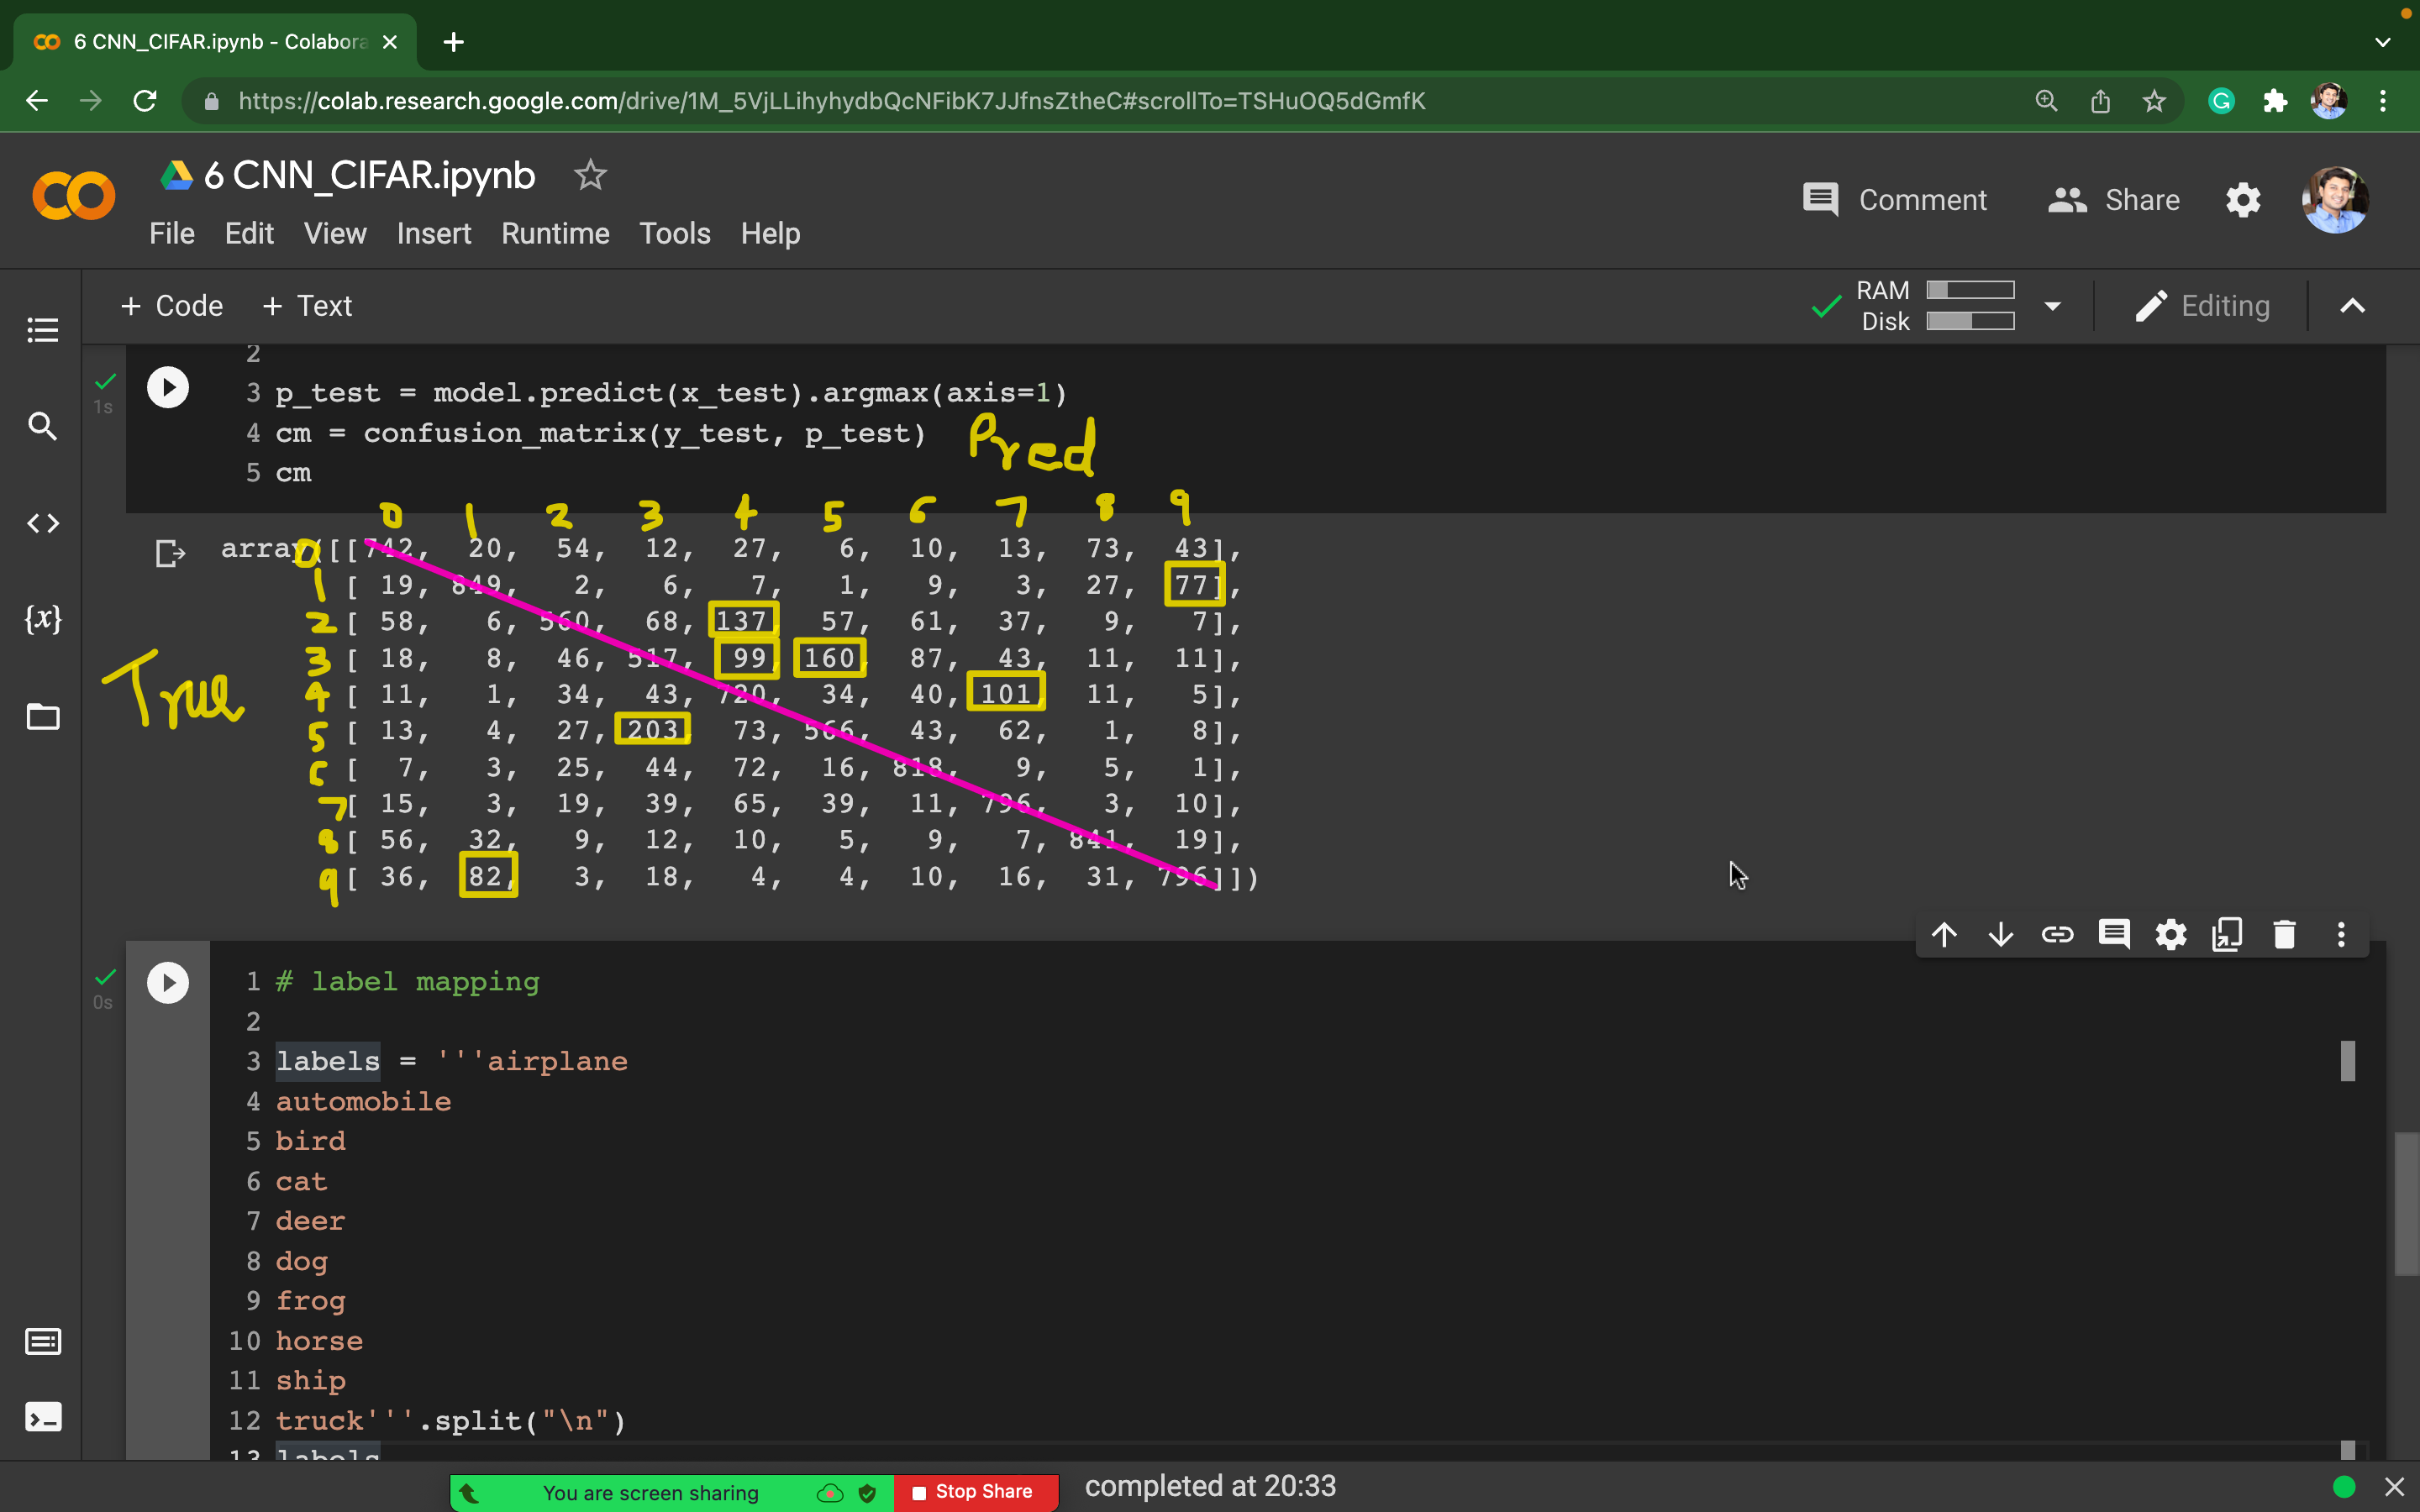

In [ ]:
# label mapping

labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

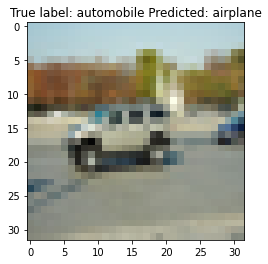

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

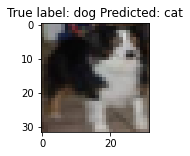

In [ ]:
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

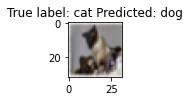

In [ ]:
plt.figure(figsize=(1,1))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

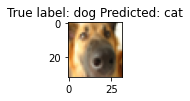

In [ ]:
plt.figure(figsize=(1,1))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

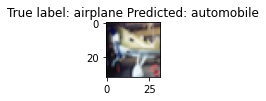

In [ ]:
plt.figure(figsize=(1,1))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

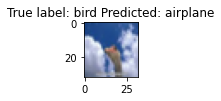

In [ ]:
plt.figure(figsize=(1,1))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

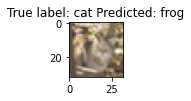

In [ ]:
plt.figure(figsize=(1,1))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

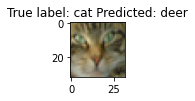

In [ ]:
plt.figure(figsize=(1,1))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

# Happy Learning